# Introduction
A deep sentiment analysis of 5000 tweets related to crypto will be provided in the report. Research analyzes the most popular tweets, hashtags, and feelings, as well as changes in sentiment scores and sentiment kinds. Additionally, it explains how retweets, favorites, and followers are distributed. Also included is an analysis of sentiment scores for each sentiment, as well as the top hashtags based on sentiment scores. In the last chapter, we present a regression analysis of sentiment scores based on retweet count and favorite count.

# Dataset
The dataset was created by compiling data from roughly 5000 tweets sent between 10:30 and 12 p.m. on February 22nd. There are 4223 rows and 14 columns in the dataset. The dataset's details are listed below.

# Technologies used
The analytical report is developed in jupyter notebook.Jupyter Notebooks is a fork of the IPython project, which used to have its own IPython Notebook project. Jupyter gets its name from the three main programming languages it supports: Julia, Python, and R. Jupyter comes with the IPython kernel, which allows you to develop Python programmes, but there are over 100 different kernels available right now.The programming language used in the development of the analytical report is python.Python is a high-level, general-purpose programming language that is interpreted. The use of considerable indentation in its design philosophy emphasises code readability. Its language elements and object-oriented approach are aimed at assisting programmers in writing clear, logical code for both small and large projects.

# Liabraries Used


In [1]:
#import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import folium

import warnings
warnings.filterwarnings('ignore')

import math
import random
from datetime import timedelta

#import color palletes
cnf='#393e46'
dth='#ff2e63'
rec ='#21bf73'
act="#fe9801"

In [3]:
crypto_data.shape

(4223, 14)

In [4]:
crypto_data.dtypes

tweet                       object
date                        object
author                      object
hashtags                    object
followers_count              int64
friends_count                int64
coordinates                float64
retweet_count                int64
favorite_count               int64
Sentiment                   object
SentimentScore_Positive    float64
SentimentScore_Negative    float64
SentimentScore_Neutral     float64
SentimentScore_Mixed       float64
dtype: object

In [5]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet                    4223 non-null   object 
 1   date                     4223 non-null   object 
 2   author                   4223 non-null   object 
 3   hashtags                 4223 non-null   object 
 4   followers_count          4223 non-null   int64  
 5   friends_count            4223 non-null   int64  
 6   coordinates              0 non-null      float64
 7   retweet_count            4223 non-null   int64  
 8   favorite_count           4223 non-null   int64  
 9   Sentiment                4223 non-null   object 
 10  SentimentScore_Positive  4223 non-null   float64
 11  SentimentScore_Negative  4223 non-null   float64
 12  SentimentScore_Neutral   4223 non-null   float64
 13  SentimentScore_Mixed     4223 non-null   float64
dtypes: float64(5), int64(4),

In [6]:
import plotly as py
py.offline.init_notebook_mode(connected= True)

In [7]:
# Let's transform our orderDate column format into the required format date and time.
crypto_data['date'] = pd.to_datetime(crypto_data['date'],infer_datetime_format = True)

In [8]:
# Load and show dataset
crypto_data = pd.read_csv('processed_tweet_df_path_with_sentiment.csv')
crypto_data.head()

tweet  \
0     spi spywolf bnb bscgem binanc bitcoin ethereum   
1  investor 's kit daili invest need bitcoin eth ...   
2                                             14/ ''   
3         bitcoin could laid low miner maladi reuter   
4         ray dalio alloc 2 portfolio bitcoin reason   

                        date          author  \
0  2022-02-22 12:06:03+00:00   Hamed58035768   
1  2022-02-22 12:06:03+00:00  btcbitcoinnews   
2  2022-02-22 12:06:02+00:00   eCashInformer   
3  2022-02-22 12:06:02+00:00     JohnLothian   
4  2022-02-22 12:06:02+00:00  acoindetective   

                                            hashtags  followers_count  \
0  ['spywolf', 'bnb', 'bscgem', 'binance', 'bitco...              108   
1  ['Bitcoin', 'ETH', 'ethereum', 'Ripple', 'cryp...              153   
2                   ['PoW', 'blockchain', 'Bitcoin']             2921   
3                                                 []             9857   
4                                                 []            11500   

   friends_count  coordinates  retweet_count  favorite_count Sentiment  \
0             49          NaN              0               0   NEUTRAL   
1            216          NaN              0               0   NEUTRAL   
2             89          NaN              0               0   NEUTRAL   
3           3511          NaN              0               0   NEUTRAL   
4           2355          NaN              0               0   NEUTRAL   

   SentimentScore_Positive  SentimentScore_Negative  SentimentScore_Neutral  \
0                 0.000625                 0.010793                0.987795   
1                 0.000651                 0.000264                0.999026   
2                 0.003838                 0.013381                0.973296   
3                 0.004296                 0.086814                0.908323   
4                 0.001372                 0.000346                0.998233   

   SentimentScore_Mixed  
0              0.000787  
1              0.000060  
2              0.009484  
3              0.000567  
4              0.000049

# 1. Correlation Model

Correlation is a method for determining the relationships between two variables.A correlation coefficient that is near to 0, but either positive or negative, indicates that the two variables have little or no relationship. A correlation coefficient near to 1 indicates that there is a positive relationship between the two variables, with increases in one variable causing increases in the other. A correlation coefficient near to -1 suggests that there is a negative relationship between two variables, with a rise in one variable resulting in a reduction in the other. For ordinal, interval, or ratio level variables, a correlation coefficient can be calculated, but it has limited value for variables measured on a nominal scale.

In [9]:
# Let's create a correlation table
corr= crypto_data.corr()
corr

followers_count  friends_count  coordinates  \
followers_count                 1.000000       0.019383          NaN   
friends_count                   0.019383       1.000000          NaN   
coordinates                          NaN            NaN          NaN   
retweet_count                   0.087980       0.004601          NaN   
favorite_count                  0.072916       0.005212          NaN   
SentimentScore_Positive        -0.008134      -0.001035          NaN   
SentimentScore_Negative        -0.005967      -0.020095          NaN   
SentimentScore_Neutral          0.011801       0.005726          NaN   
SentimentScore_Mixed           -0.008122       0.018401          NaN   

                         retweet_count  favorite_count  \
followers_count               0.087980        0.072916   
friends_count                 0.004601        0.005212   
coordinates                        NaN             NaN   
retweet_count                 1.000000        0.966057   
favorite_count                0.966057        1.000000   
SentimentScore_Positive      -0.011805       -0.009696   
SentimentScore_Negative      -0.008332       -0.002194   
SentimentScore_Neutral        0.016904        0.010715   
SentimentScore_Mixed         -0.011769       -0.009401   

                         SentimentScore_Positive  SentimentScore_Negative  \
followers_count                        -0.008134                -0.005967   
friends_count                          -0.001035                -0.020095   
coordinates                                  NaN                      NaN   
retweet_count                          -0.011805                -0.008332   
favorite_count                         -0.009696                -0.002194   
SentimentScore_Positive                 1.000000                -0.013313   
SentimentScore_Negative                -0.013313                 1.000000   
SentimentScore_Neutral                 -0.565590                -0.695176   
SentimentScore_Mixed                    0.092674                 0.104868   

                         SentimentScore_Neutral  SentimentScore_Mixed  
followers_count                        0.011801             -0.008122  
friends_count                          0.005726              0.018401  
coordinates                                 NaN                   NaN  
retweet_count                          0.016904             -0.011769  
favorite_count                         0.010715             -0.009401  
SentimentScore_Positive               -0.565590              0.092674  
SentimentScore_Negative               -0.695176              0.104868  
SentimentScore_Neutral                 1.000000             -0.554221  
SentimentScore_Mixed                  -0.554221              1.000000

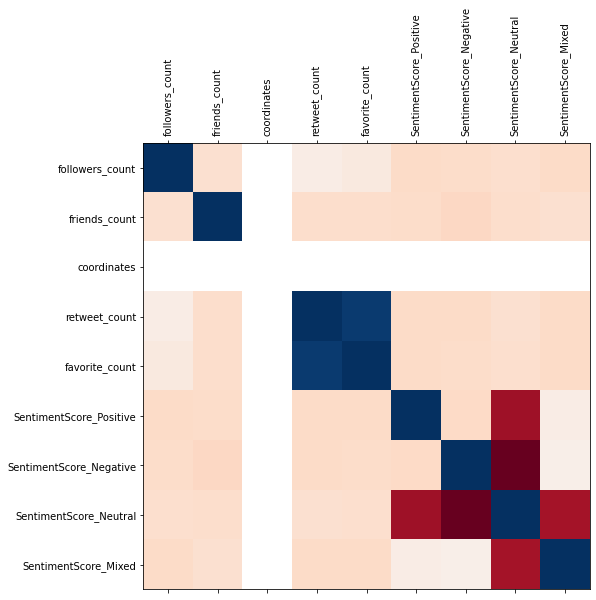

In [10]:
#Let's plot a correlation figure
fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

# Correlation Analysis Result
When we look at the correlation plot, we can see that the corelation of the sentiment scores with the number of retweets, friends, and favourites is either negative or negligible, with the exception of the neutral sentiment score, which is positively correlated with the number of retweets and favourites, while its corelation with the number of friends and followers is also negligible. We can also see that mixed sentiment score also has positive correlation with the friends count.

# 2. Popularity of Sentiments, Tweets and Hashtags

In [11]:
popular_tweets = crypto_data['tweet'].value_counts(ascending=False)
popular_tweets 

know probabl might heard bitcoin n't know work tri week ago woman recommend twitter guid made return 10500 week trade connect                                                                                97
want see happi end nft nftartist art bitcoin openseanft ethereumnft btc nft nftcollector eth collector gamedev nft nftcollector btc bnb nftgame nftproject nftgiveaway nftcommun nftdrop nftshill opensea    49
bitcoin                                                                                                                                                                                                      44
digit gold bitcoin plummet lt 37k gold risen gt 1900/oz correl digit amp analog gold even neg narr digit gold better way escap pan ukrain                                                                    42
bitcoin ''                                                                                                                                                              

The plot is showing the top 10 most popular tweets.

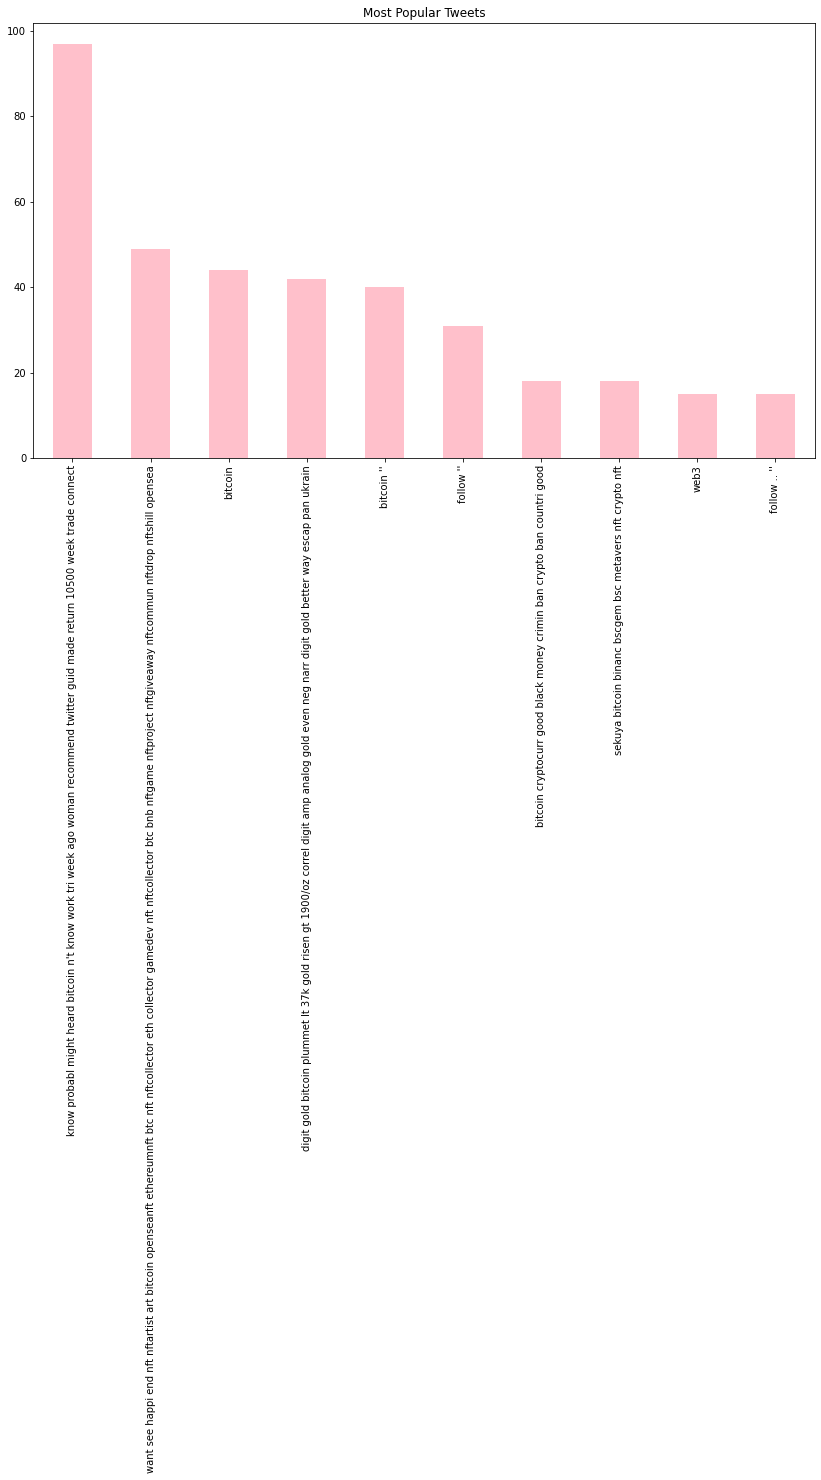

In [12]:
popular_tweets.head(10).plot(kind='bar',title='Most Popular Tweets',figsize=(14,8), color= 'pink')
plt.show()

The pie chart displays the pouplarity of sentiments by percentage, with 92.7% Neutral sentiment is the most popular one, with 3.5% negative sentiment comes at second and with 2.2% and 1.7% positive and mixed come at third and fourth respectively.

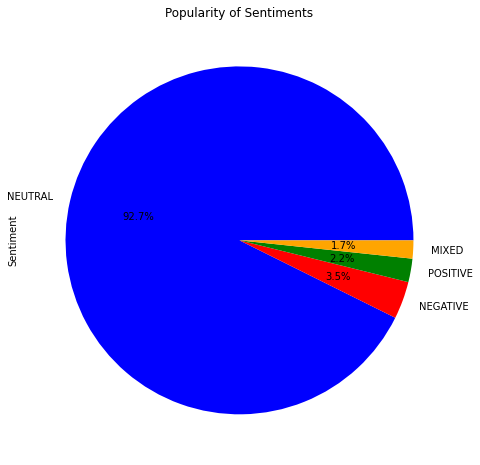

In [13]:
crypto_data['Sentiment'].value_counts().plot(kind='pie',title='Popularity of Sentiments', autopct ='%1.1f%%',
                                             colors=['blue','red','green','orange'] ,figsize=(14,8))
plt.show()

In [14]:
crypto_data.columns

Index(['tweet', 'date', 'author', 'hashtags', 'followers_count',
       'friends_count', 'coordinates', 'retweet_count', 'favorite_count',
       'Sentiment', 'SentimentScore_Positive', 'SentimentScore_Negative',
       'SentimentScore_Neutral', 'SentimentScore_Mixed'],
      dtype='object')

In [15]:
crypto_data['hashtags'].value_counts(ascending=False)

[]                                                                                                                                                                                                                                               1459
['Bitcoin']                                                                                                                                                                                                                                       370
['bitcoin']                                                                                                                                                                                                                                       209
['bullish', 'bluesparrow', 'BlueSparrow', 'BlueSparrow', 'BlueSparrow', 'bluesparrowETH', 'bluesparrow', 'BlueSparrowETH', 'bluesparrow', 'Bluesparrowcharity', 'bluesparrowtoken', 'bitcoin', 'token', 'crypto', 'WEB3', 'bluesparrowtoken']     100
['ETH', 'BlueSpa

In [16]:
popular_hashtags = crypto_data['hashtags'].value_counts(ascending=False)

The ar plot is displaying the top 10 hashtags and Bitcoin is the most popular hashtag.

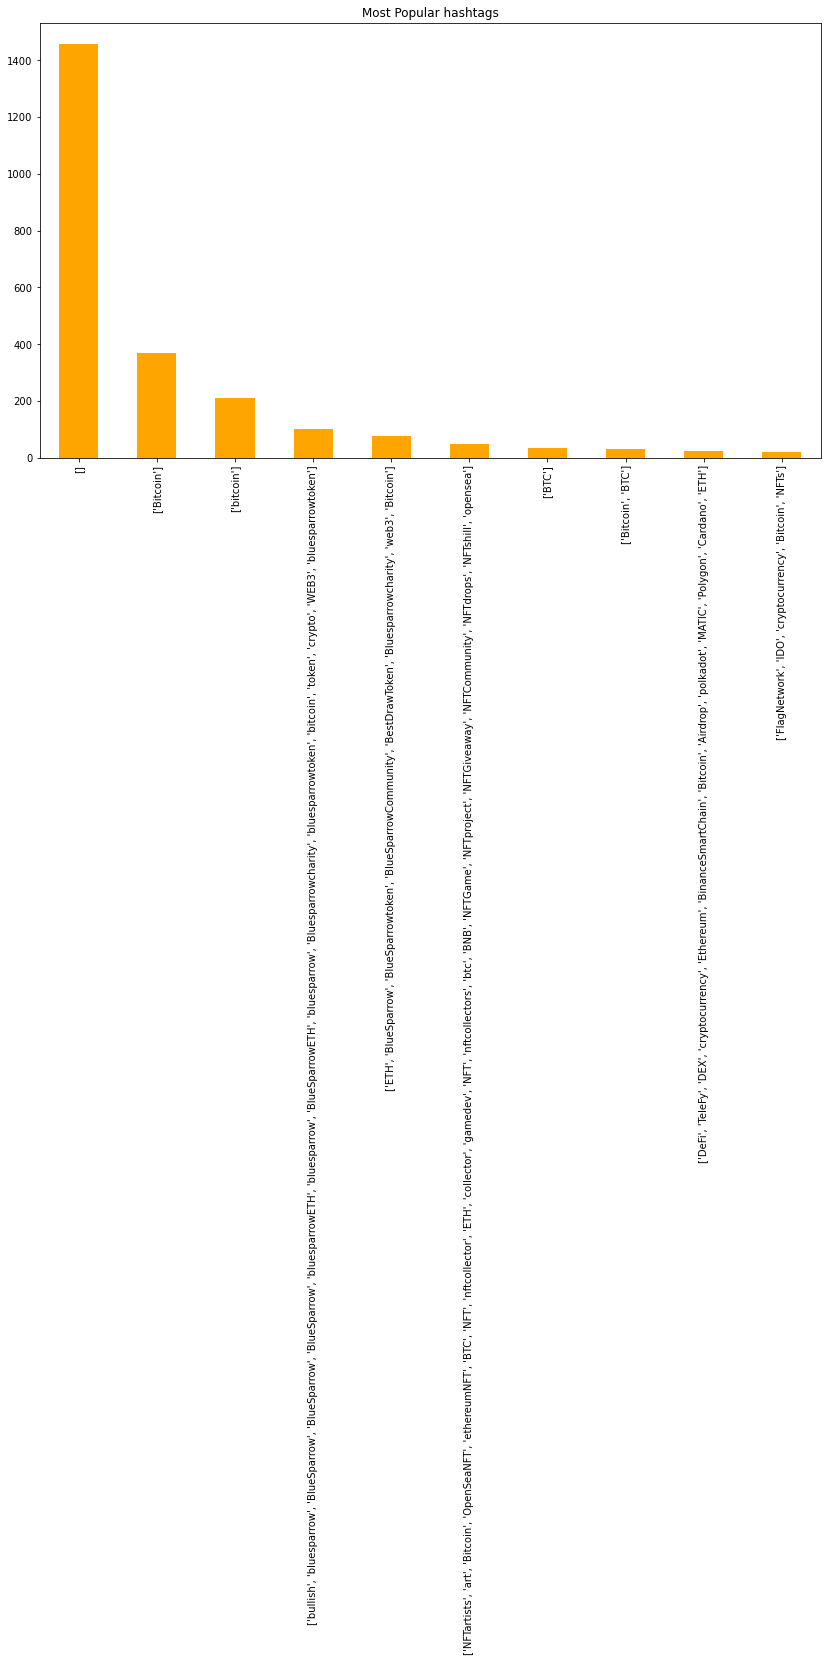

In [17]:
popular_hashtags.head(10).plot(kind='bar',title='Most Popular hashtags',figsize=(14,8), color= 'orange')
plt.show()

In [18]:
crypto_data.columns

Index(['tweet', 'date', 'author', 'hashtags', 'followers_count',
       'friends_count', 'coordinates', 'retweet_count', 'favorite_count',
       'Sentiment', 'SentimentScore_Positive', 'SentimentScore_Negative',
       'SentimentScore_Neutral', 'SentimentScore_Mixed'],
      dtype='object')

# 3.Distribution of number of followers, favorites, retweet counts and friends count

# Methods and Objectives
This section was created using the Pandas and Matplotlib libraries. The Value counts function is used to count the number of followers, and then the data is plotted using the Matplotlib library. The goal of creating this part is to look at the impact of these tweets by looking at the favorite, retweets, followers, and friends.

In the data, the number of followers is normally distributed between 0 and 20, and it is distributed between 0 and 120 with a relatively low frequency beyond 20.

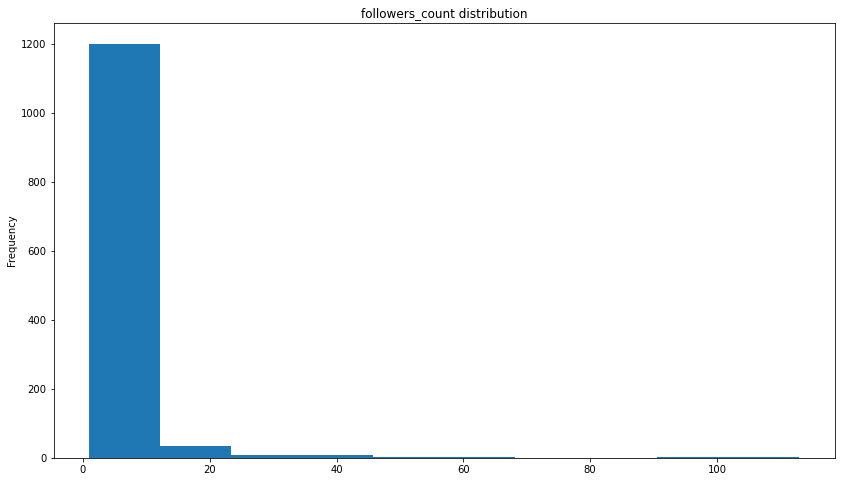

In [19]:
crypto_data['followers_count'].value_counts().plot(kind='hist',title='followers_count distribution',figsize=(14,8))
plt.show()

Between 0 and 20 points, there is the largest frequency of number of friends, and after that, there is a very low frequency. The number of friends is a variable that ranges from 0 to 140.

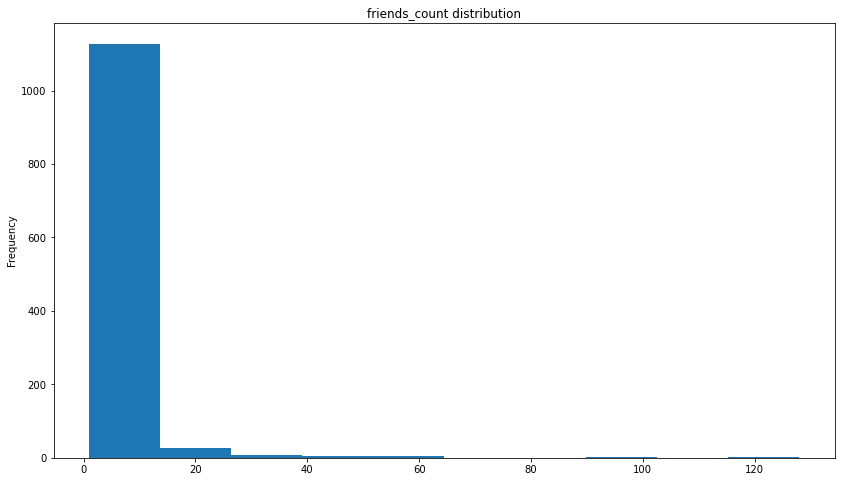

In [20]:
crypto_data['friends_count'].value_counts().plot(kind='hist',title='friends_count distribution',figsize=(14,8))
plt.show()

The number of favourites with the highest frequency is between 0-500. After 2500, there is an extremely low frequency. Between 700 and 2500, there is hardly no periodicity.

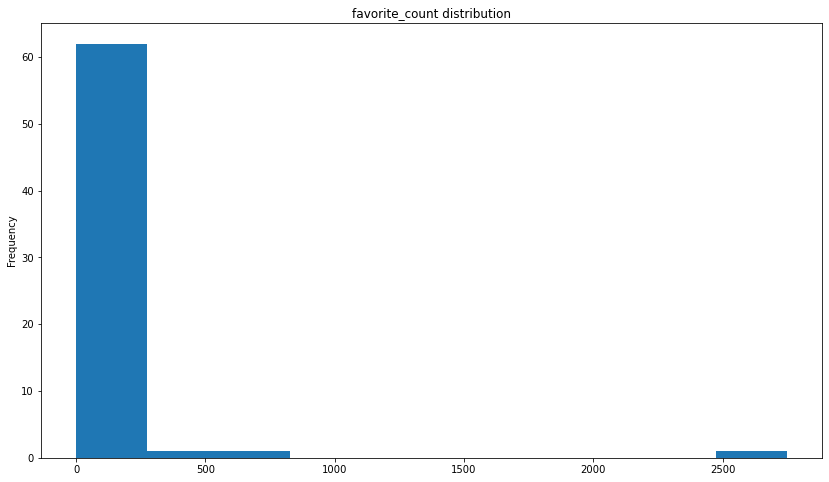

In [21]:
crypto_data['favorite_count'].value_counts().plot(kind='hist',title='favorite_count distribution',figsize=(14,8))
plt.show()

Retweets have the highest frequency between 0 and 500 points, almost no frequency between 700 and 3000 points, and a very low frequency between 3000 and 3700 points.

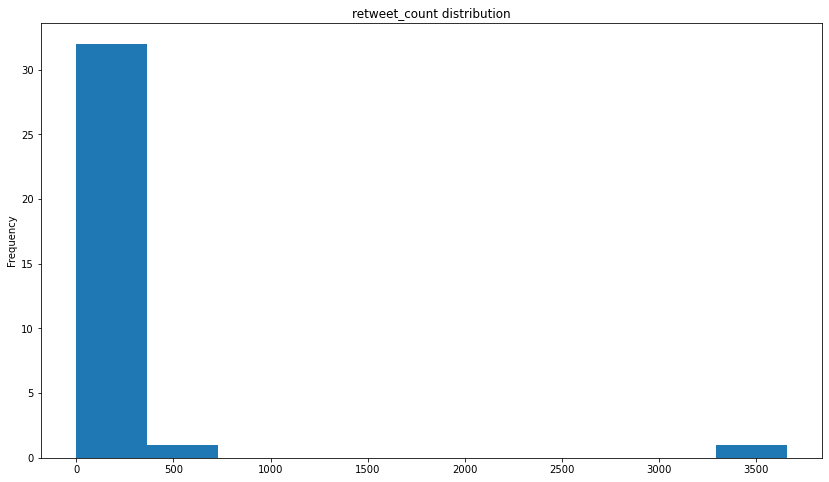

In [22]:
crypto_data['retweet_count'].value_counts().plot(kind='hist',title='retweet_count distribution',figsize=(14,8))
plt.show()

# 4. Sentiments Score Trend Analysis by time, retweets and favorites

In [23]:
SentimentScore_Positive_by_date = crypto_data.groupby('date').mean()['SentimentScore_Positive'].reset_index()
SentimentScore_Negative_by_date = crypto_data.groupby('date').mean()['SentimentScore_Negative'].reset_index()
SentimentScore_Neutral_by_date = crypto_data.groupby('date').mean()['SentimentScore_Neutral'].reset_index()
SentimentScore_Mixed_by_date = crypto_data.groupby('date').mean()['SentimentScore_Mixed'].reset_index()

In [24]:
top10positive = SentimentScore_Positive_by_date.sort_values('SentimentScore_Positive',ascending=0).head(10)
top10positive

date  SentimentScore_Positive
719   2022-02-22 10:53:37+00:00                 0.996263
2452  2022-02-22 11:51:05+00:00                 0.995342
1667  2022-02-22 11:24:45+00:00                 0.992300
48    2022-02-22 10:29:44+00:00                 0.978629
79    2022-02-22 10:30:37+00:00                 0.968057
217   2022-02-22 10:35:19+00:00                 0.967188
284   2022-02-22 10:38:08+00:00                 0.937121
1586  2022-02-22 11:22:01+00:00                 0.931993
1473  2022-02-22 11:17:42+00:00                 0.927233
2236  2022-02-22 11:43:46+00:00                 0.924746

In [25]:
top10negative = SentimentScore_Negative_by_date.sort_values('SentimentScore_Negative',ascending=0).head(10)
top10negative

date  SentimentScore_Negative
1961  2022-02-22 11:34:21+00:00                 0.985341
400   2022-02-22 10:42:27+00:00                 0.980393
1595  2022-02-22 11:22:17+00:00                 0.969666
2763  2022-02-22 12:01:27+00:00                 0.915479
1662  2022-02-22 11:24:35+00:00                 0.913612
1626  2022-02-22 11:23:14+00:00                 0.909454
2754  2022-02-22 12:01:14+00:00                 0.908822
2140  2022-02-22 11:40:10+00:00                 0.905784
2780  2022-02-22 12:01:57+00:00                 0.901380
1153  2022-02-22 11:07:12+00:00                 0.896975

In [26]:
top10neutral = SentimentScore_Neutral_by_date.sort_values('SentimentScore_Neutral',ascending=0).head(10)
top10neutral

date  SentimentScore_Neutral
1946  2022-02-22 11:33:57+00:00                0.999599
351   2022-02-22 10:40:40+00:00                0.999594
2578  2022-02-22 11:55:42+00:00                0.999585
1413  2022-02-22 11:15:38+00:00                0.999580
277   2022-02-22 10:37:56+00:00                0.999571
393   2022-02-22 10:42:14+00:00                0.999569
2212  2022-02-22 11:42:49+00:00                0.999561
10    2022-02-22 10:28:01+00:00                0.999559
1449  2022-02-22 11:16:57+00:00                0.999550
201   2022-02-22 10:34:36+00:00                0.999546

In [27]:
top10mixed = SentimentScore_Mixed_by_date.sort_values('SentimentScore_Mixed',ascending=0).head(10)
top10mixed

date  SentimentScore_Mixed
2237  2022-02-22 11:43:47+00:00              0.956861
1416  2022-02-22 11:15:46+00:00              0.942364
1920  2022-02-22 11:33:05+00:00              0.882220
104   2022-02-22 10:31:38+00:00              0.871897
1249  2022-02-22 11:10:16+00:00              0.853191
1987  2022-02-22 11:35:08+00:00              0.835652
1769  2022-02-22 11:28:33+00:00              0.823624
319   2022-02-22 10:39:34+00:00              0.815435
2292  2022-02-22 11:45:25+00:00              0.783056
1224  2022-02-22 11:09:34+00:00              0.763101

In this scatter plot, the date is taken as xaxis and sentiment scores on the yaxis. The plots are developed using go.scatter() function. The graph displays the highest average scores across the time period. The plot dispalys the highest average sentiment scores for each sentiment score type. The plot is interactive so you can see the sentiment scores and time by hovering on the data points.

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=top10positive['date']
                         , y =top10positive['SentimentScore_Positive']
                         , mode = 'lines + markers', name='SentimentScore_Positive', line = dict(color="Green", width = 2)))
fig.add_trace(go.Scatter(x=top10negative['date']
                         , y =top10negative['SentimentScore_Negative']
                         , mode = 'lines + markers', name='SentimentScore_Negative', line = dict(color="Red", width = 2)))
fig.add_trace(go.Scatter(x=top10neutral['date']
                         , y =top10neutral['SentimentScore_Neutral']
                         , mode = 'lines + markers', name='SentimentScore_Neutral', line = dict(color="Blue", width = 2)))
fig.add_trace(go.Scatter(x=top10mixed['date']
                         , y =top10mixed['SentimentScore_Mixed']
                         , mode = 'lines + markers', name='SentimentScore_Mixed', line = dict(color="Orange", width = 2)))
fig.update_layout(title='Highest Average Sentiments Scores',xaxis_tickfont_size = 14, yaxis = dict(title='Sentiment score'))
fig.show()

In [40]:
crypto_data.columns

Index(['tweet', 'date', 'author', 'hashtags', 'followers_count',
       'friends_count', 'coordinates', 'retweet_count', 'favorite_count',
       'Sentiment', 'SentimentScore_Positive', 'SentimentScore_Negative',
       'SentimentScore_Neutral', 'SentimentScore_Mixed'],
      dtype='object')

# Overall sentiment scores analysis by retweet_count

In this plot retweet count is taken at xaxis and sentiment scores at yaxis. The plot is interactive so we can see the sentiment score by retweet count by hovering over the data types. We can see that the neutral sentiment score is inceased with the retweet count, while the negative, positive and mixed sentiment scores decreased with the retweet count.

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=crypto_data['retweet_count']
                         , y =crypto_data['SentimentScore_Positive']
                         , mode = 'lines + markers', name='SentimentScore_Positive', line = dict(color="Green", width = 2)))
fig.add_trace(go.Scatter(x=crypto_data['retweet_count']
                         , y =crypto_data['SentimentScore_Negative']
                         , mode = 'lines + markers', name='SentimentScore_Negative', line = dict(color="Red", width = 2)))
fig.add_trace(go.Scatter(x=crypto_data['retweet_count']
                         , y =crypto_data['SentimentScore_Neutral']
                         , mode = 'lines + markers', name='SentimentScore_Neutral', line = dict(color="Blue", width = 2)))
fig.add_trace(go.Scatter(x=crypto_data['retweet_count']
                         , y =crypto_data['SentimentScore_Mixed']
                         , mode = 'lines + markers', name='SentimentScore_Mixed', line = dict(color="Orange", width = 2)))
fig.update_layout(title='Sentiments Scores',xaxis_tickfont_size = 14, yaxis = dict(title='Sentiment score'))
fig.show()

# Overall sentiment scores analysis by favorite_count

The sentiment scores for favorite_count and retweet_count follow the same trend.

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=crypto_data['favorite_count']
                         , y =crypto_data['SentimentScore_Positive']
                         , mode = 'lines + markers', name='SentimentScore_Positive', line = dict(color="Green", width = 2)))
fig.add_trace(go.Scatter(x=crypto_data['favorite_count']
                         , y =crypto_data['SentimentScore_Negative']
                         , mode = 'lines + markers', name='SentimentScore_Negative', line = dict(color="Red", width = 2)))
fig.add_trace(go.Scatter(x=crypto_data['favorite_count']
                         , y =crypto_data['SentimentScore_Neutral']
                         , mode = 'lines + markers', name='SentimentScore_Neutral', line = dict(color="Blue", width = 2)))
fig.add_trace(go.Scatter(x=crypto_data['favorite_count']
                         , y =crypto_data['SentimentScore_Mixed']
                         , mode = 'lines + markers', name='SentimentScore_Mixed', line = dict(color="Orange", width = 2)))
fig.update_layout(title='Sentiments Scores',xaxis_tickfont_size = 14, yaxis = dict(title='Sentiment score'))
fig.show()

# 5.Sentiment scores trend by setiments types

# Neutral Sentiments

In [43]:
Neutral_sentiments = crypto_data.query('Sentiment == "NEUTRAL"')

In [44]:
Neutral_sentiments.head()

tweet  \
0     spi spywolf bnb bscgem binanc bitcoin ethereum   
1  investor 's kit daili invest need bitcoin eth ...   
2                                             14/ ''   
3         bitcoin could laid low miner maladi reuter   
4         ray dalio alloc 2 portfolio bitcoin reason   

                        date          author  \
0  2022-02-22 12:06:03+00:00   Hamed58035768   
1  2022-02-22 12:06:03+00:00  btcbitcoinnews   
2  2022-02-22 12:06:02+00:00   eCashInformer   
3  2022-02-22 12:06:02+00:00     JohnLothian   
4  2022-02-22 12:06:02+00:00  acoindetective   

                                            hashtags  followers_count  \
0  ['spywolf', 'bnb', 'bscgem', 'binance', 'bitco...              108   
1  ['Bitcoin', 'ETH', 'ethereum', 'Ripple', 'cryp...              153   
2                   ['PoW', 'blockchain', 'Bitcoin']             2921   
3                                                 []             9857   
4                                                 []            11500   

   friends_count  coordinates  retweet_count  favorite_count Sentiment  \
0             49          NaN              0               0   NEUTRAL   
1            216          NaN              0               0   NEUTRAL   
2             89          NaN              0               0   NEUTRAL   
3           3511          NaN              0               0   NEUTRAL   
4           2355          NaN              0               0   NEUTRAL   

   SentimentScore_Positive  SentimentScore_Negative  SentimentScore_Neutral  \
0                 0.000625                 0.010793                0.987795   
1                 0.000651                 0.000264                0.999026   
2                 0.003838                 0.013381                0.973296   
3                 0.004296                 0.086814                0.908323   
4                 0.001372                 0.000346                0.998233   

   SentimentScore_Mixed  
0              0.000787  
1              0.000060  
2              0.009484  
3              0.000567  
4              0.000049

Sentiment scores are computed by y-axis, the retweet count and x-axis the retweet count. Subplots are then shown. With the increase in retweets, only the neutral sentiment score increases, while all other scores decrease.

In [45]:
fig1= px.line(Neutral_sentiments, x='retweet_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig2= px.line(Neutral_sentiments, x='retweet_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig3= px.line(Neutral_sentiments, x='retweet_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig4= px.line(Neutral_sentiments, x='retweet_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Neutral by retweet count',
                   'SentimentScore_Positive by retweet count',
                   'SentimentScore_Negative by retweet count',
                   'SentimentScore_Mixed by retweet count'))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

In [46]:
Neutral_sentiments.columns

Index(['tweet', 'date', 'author', 'hashtags', 'followers_count',
       'friends_count', 'coordinates', 'retweet_count', 'favorite_count',
       'Sentiment', 'SentimentScore_Positive', 'SentimentScore_Negative',
       'SentimentScore_Neutral', 'SentimentScore_Mixed'],
      dtype='object')

The trend of sentiment scores by favorites is almost similar to that of retweets.

In [47]:
fig1= px.line(Neutral_sentiments, x='favorite_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig2= px.line(Neutral_sentiments, x='favorite_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig3= px.line(Neutral_sentiments, x='favorite_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig4= px.line(Neutral_sentiments, x='favorite_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Neutral by favorite_count',
                   'SentimentScore_Positive by favorite_count',
                   'SentimentScore_Negative by favorite_count',
                   'SentimentScore_Mixed by favorite_count'))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

# Negative Sentiments

In [48]:
Negative_sentiments = crypto_data.query('Sentiment == "NEGATIVE"')

In [49]:
Negative_sentiments.head()

tweet  \
109  never renew requir 3 day storag would 1 pwh world   
141  dip wo n't last much long accumul much whole '...   
145                               use monero stop mess   
149  good morn dont current use bank store everyth ...   
165                could buy 2 bitcoin today would mad   

                          date           author               hashtags  \
109  2022-02-22 12:04:14+00:00    bitcoin_eagle                     []   
141  2022-02-22 12:03:42+00:00     Positive_wal                     []   
145  2022-02-22 12:03:40+00:00         cenan_ku  ['Bitcoin', 'Monero']   
149  2022-02-22 12:03:37+00:00  RowanBa61286998                     []   
165  2022-02-22 12:03:17+00:00       alweaverii            ['bitcoin']   

     followers_count  friends_count  coordinates  retweet_count  \
109             1023            748          NaN              0   
141              168           2740          NaN              0   
145              190            344          NaN              0   
149               28            153          NaN              0   
165               50            186          NaN              0   

     favorite_count Sentiment  SentimentScore_Positive  \
109               0  NEGATIVE                 0.006458   
141               0  NEGATIVE                 0.031634   
145               0  NEGATIVE                 0.004236   
149               0  NEGATIVE                 0.007728   
165               0  NEGATIVE                 0.000760   

     SentimentScore_Negative  SentimentScore_Neutral  SentimentScore_Mixed  
109                 0.782336                0.205744              0.005462  
141                 0.921090                0.046305              0.000970  
145                 0.917629                0.043236              0.034899  
149                 0.508933                0.333538              0.149801  
165                 0.911703                0.086599              0.000938

In [50]:
Negative_sentiments.columns

Index(['tweet', 'date', 'author', 'hashtags', 'followers_count',
       'friends_count', 'coordinates', 'retweet_count', 'favorite_count',
       'Sentiment', 'SentimentScore_Positive', 'SentimentScore_Negative',
       'SentimentScore_Neutral', 'SentimentScore_Mixed'],
      dtype='object')

In this subplot, we can observe that negative and neutral sentiment scores have followed nearly identical trends: with a slight increase in retweet counts, sentiment scores rise; however, as retweet counts rise, sentiment ratings fall. There is a downward tendency in the positive and mixed sentiment scores.

In [51]:
fig1= px.line(Negative_sentiments, x='retweet_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig2= px.line(Negative_sentiments, x='retweet_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig3= px.line(Negative_sentiments, x='retweet_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig4= px.line(Negative_sentiments, x='retweet_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Negative by retweet count',
                   'SentimentScore_Positive by retweet count',
                   'SentimentScore_Neutral by retweet count',
                   'SentimentScore_Mixed by retweet count'))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

In terms of sentiment scores, favorite count follows the same pattern as retweet count. There is no doubt that for negative sentiment the favorite count and retweet count are significantly lower than those for neutral sentiment.

In [52]:
fig1= px.line(Negative_sentiments, x='favorite_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig2= px.line(Negative_sentiments, x='favorite_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig3= px.line(Negative_sentiments, x='favorite_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig4= px.line(Negative_sentiments, x='favorite_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Negative by favorite_count',
                   'SentimentScore_Positive by favorite_count',
                   'SentimentScore_Neutral by favorite_count',
                   'SentimentScore_Mixed by favorite_count'))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

# Positive Sentiments

In [53]:
Positive_sentiments.columns

NameError: name 'Positive_sentiments' is not defined

In [ ]:
Positive_sentiments = crypto_data.query('Sentiment == "POSITIVE"')

In [ ]:
Positive_sentiments.head()

Retweet and favorite counts for positive sentiment are even lower than negative sentiment, and we can see that both positive and negative sentiment scores are moving in both positive and negative directions with the increase of retweet counts, whereas negative sentiment is following a complete downward trend.

In [ ]:
fig1= px.line(Positive_sentiments, x='retweet_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig2= px.line(Positive_sentiments, x='retweet_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig3= px.line(Positive_sentiments, x='retweet_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig4= px.line(Positive_sentiments, x='retweet_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Positive by retweet count',
                   'SentimentScore_Negative by retweet count',
                   'SentimentScore_Neutral by retweet count',
                   'SentimentScore_Mixed by retweet count'))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

the favorites are lower than the negaive sentiment, and all sentiment scores show some upward and downward movements, negative sentiment score has shown the most negative tend.

In [ ]:
fig1= px.line(Positive_sentiments, x='favorite_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig2= px.line(Positive_sentiments, x='favorite_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig3= px.line(Positive_sentiments, x='favorite_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig4= px.line(Positive_sentiments, x='favorite_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Positive by retweet count',
                   'SentimentScore_Negative by favorite_count',
                   'SentimentScore_Neutral by favorite_count',
                   'SentimentScore_Mixed by favorite_count'))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

# Mixed Sentiments

In [ ]:
Mixed_sentiments.columns

In [ ]:
Mixed_sentiments = crypto_data.query('Sentiment == "MIXED"')
Mixed_sentiments.head()

There is a mixed trend in sentiment scores, with upward and downward movements as follower and retweet counts increase, but the retweet and follower counts are lower than for positive sentiment.

In [ ]:
fig1= px.line(Mixed_sentiments, x='retweet_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])
fig2= px.line(Mixed_sentiments, x='retweet_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig3= px.line(Mixed_sentiments, x='retweet_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig4= px.line(Mixed_sentiments, x='retweet_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Mixed by retweet count',
                   'SentimentScore_Negative by retweet count',
                   'SentimentScore_Positive by retweet count',
                   'SentimentScore_Neutral by retweet count'))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

In [ ]:
fig1= px.line(Mixed_sentiments, x='favorite_count', y='SentimentScore_Mixed', color_discrete_sequence=[act])
fig2= px.line(Mixed_sentiments, x='favorite_count', y='SentimentScore_Negative', color_discrete_sequence=[dth])
fig3= px.line(Mixed_sentiments, x='favorite_count', y='SentimentScore_Positive', color_discrete_sequence=[rec])
fig4= px.line(Mixed_sentiments, x='favorite_count', y='SentimentScore_Neutral', color_discrete_sequence=[cnf])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                   subplot_titles=('SentimentScore_Mixed by favorite_count',
                   'SentimentScore_Negative by favorite_count ',
                   'SentimentScore_Positive by favorite_count ',
                   'SentimentScore_Neutral by favorite_count '))

fig.add_trace(fig1['data'][0], row=1, col =1)
fig.add_trace(fig2['data'][0], row=1, col =2)
fig.add_trace(fig3['data'][0], row=2, col =1)
fig.add_trace(fig4['data'][0], row=2, col =2)

fig.update_layout(height=1000)
fig.show()

# 6. Investigation of sentiments by hashtags

In [ ]:
hashtags_positivescore = crypto_data.pivot_table(index="hashtags",values="SentimentScore_Positive"
                                       ,aggfunc=np.mean)

In [ ]:
hashtags_positivescore

# 7.Sentiments score by Hashtags

In [ ]:
hashtags_scorepositive = crypto_data.groupby('hashtags').mean()['SentimentScore_Positive'].reset_index()
hashtags_scorepositive

In [ ]:
top100_bypositivescore =hashtags_scorepositive.sort_values('SentimentScore_Positive',ascending=0).head(100)
top100_bypositivescore

In [ ]:
hashtags_scorenegative = crypto_data.groupby('hashtags').mean()['SentimentScore_Negative'].reset_index()
hashtags_scorenegative

In [ ]:
top100_bynegativescore = hashtags_scorenegative.sort_values('SentimentScore_Negative',ascending=0).head(100)
top100_bynegativescore

In [ ]:
hashtags_scoreneutral = crypto_data.groupby('hashtags').mean()['SentimentScore_Neutral'].reset_index()
hashtags_scoreneutral

In [ ]:
top100_byneutralcore =hashtags_scoreneutral.sort_values('SentimentScore_Neutral',ascending=0).head(100)
top100_byneutralcore

In [ ]:
hashtags_scoremixed = crypto_data.groupby('hashtags').mean()['SentimentScore_Mixed'].reset_index()
hashtags_scoremixed

In [ ]:
top100_byneutmixed =hashtags_scoremixed.sort_values('SentimentScore_Mixed',ascending=0).head(100)
top100_byneutmixed

The bar plots display the top 100 hashtags by average sentiment scores. The bar plots are plotted by taking hashtags at x-axis and Sentiment scores at y-axis.

In [ ]:
fig_c = px.bar(top100_bypositivescore, x='hashtags', y ='SentimentScore_Positive', color_discrete_sequence=[rec])
fig_d = px.bar(top100_bynegativescore, x='hashtags', y ='SentimentScore_Negative', color_discrete_sequence=[dth])

fig = make_subplots(rows =1,cols =2, shared_xaxes=False, horizontal_spacing=0.1,
                   subplot_titles=('Highest SentimentScore_Positive by hashtags','Highest SentimentScore_Negative by hashtags'))

fig.add_trace(fig_c['data'][0],row= 1, col= 1)
fig.add_trace(fig_d['data'][0],row= 1, col= 2)

fig.update_layout(height=480)
fig.show()

In [ ]:
fig_e = px.bar(top100_byneutralcore, x='hashtags', y ='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig_f = px.bar(top100_byneutmixed, x='hashtags', y ='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows =1,cols =2, shared_xaxes=False, horizontal_spacing=0.1,
                   subplot_titles=('Highest SentimentScore_Neutral by hashtags','Highest SentimentScore_Mixed by hashtags'))

fig.add_trace(fig_e['data'][0],row= 1, col= 1)
fig.add_trace(fig_f['data'][0],row= 1, col= 2)

fig.update_layout(height=480)
fig.show()

In [ ]:
crypto_data.columns

# 8.Sentiments scores analysis by sentiments

In [ ]:
SentimentScore_Mixed = crypto_data.groupby('Sentiment').mean()['SentimentScore_Mixed'].reset_index()
SentimentScore_Mixed

The mixed sentiment score is highest for mixed sentiment and lowest for neutral sentiment.

In [ ]:
px.bar(SentimentScore_Mixed, x='Sentiment', y ='SentimentScore_Mixed', color_discrete_sequence=[act])

In [ ]:
SentimentScore_Negative = crypto_data.groupby('Sentiment').mean()['SentimentScore_Negative'].reset_index()
SentimentScore_Negative

Neagative sentiment score is highest for negative sentiment type and lowest for neutral sentiment

In [ ]:
px.bar(SentimentScore_Negative, x='Sentiment', y ='SentimentScore_Negative', color_discrete_sequence=[dth])

In [ ]:
SentimentScore_Positive = crypto_data.groupby('Sentiment').mean()['SentimentScore_Positive'].reset_index()
SentimentScore_Positive

Positive sentiment score is highest for positive sentiment and lowest for negative sentiment.

In [ ]:
px.bar(SentimentScore_Positive, x='Sentiment', y ='SentimentScore_Positive', color_discrete_sequence=[rec])

In [ ]:
SentimentScore_Neutral = crypto_data.groupby('Sentiment').mean()['SentimentScore_Neutral'].reset_index()
SentimentScore_Neutral

Neutral sentiment score is highest or neutral sentiment and lowest for the mixed sentiment.

In [ ]:
px.bar(SentimentScore_Neutral, x='Sentiment', y ='SentimentScore_Neutral', color_discrete_sequence=[cnf])

In [ ]:
crypto_data.columns

# 9. Predictive Analysis for Senntiments scores by Tweets and favorites

In [ ]:
sns.regplot(x='SentimentScore_Positive',y='retweet_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Positive')

In [ ]:
sns.regplot(x='SentimentScore_Negative',y='retweet_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Negative')

In [ ]:
sns.regplot(x='SentimentScore_Neutral',y='retweet_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Neutral')

In [ ]:
sns.regplot(x='SentimentScore_Mixed',y='retweet_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Mixed')

In [ ]:
sns.regplot(x='SentimentScore_Positive',y='favorite_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Positive')

In [ ]:
sns.regplot(x='SentimentScore_Negative',y='favorite_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Negative')

In [ ]:
sns.regplot(x='SentimentScore_Neutral',y='favorite_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Neutral')

In [ ]:
sns.regplot(x='SentimentScore_Mixed',y='favorite_count', data =crypto_data, line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Mixed')